# Imports

In [1]:
#Always make all imports in the first cell of the notebook, run them all once.
import numpy as np
import skimage.io as io
from Preproccessing import preproccessing
from FeatureExtraction import extract_features
from IO import ReadDataSet
from Phase1 import Phase1
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import f1_score, accuracy_score
import cv2
import os
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Read Dataset

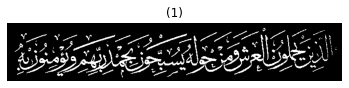

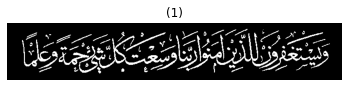

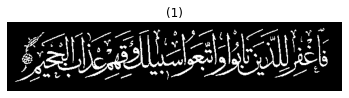

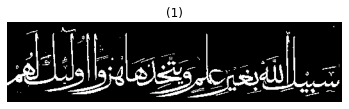

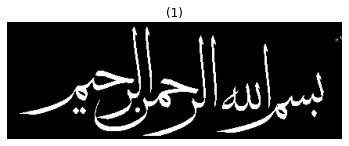

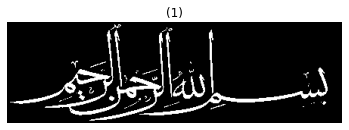

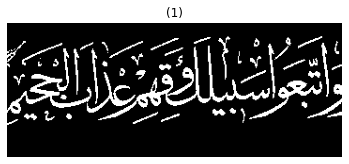

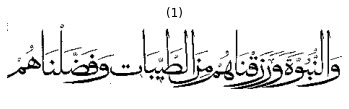

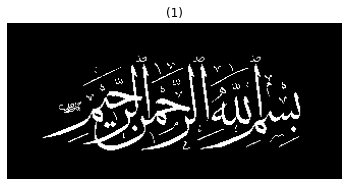

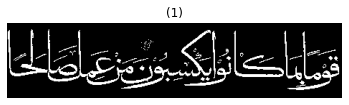

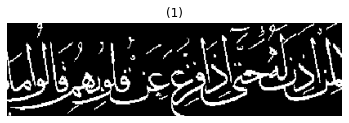

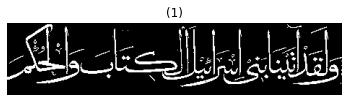

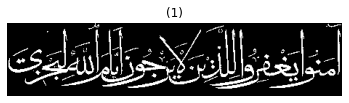

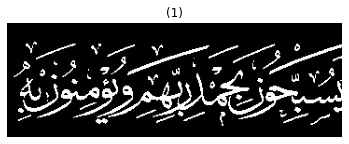

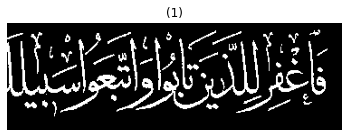

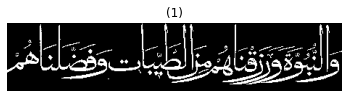

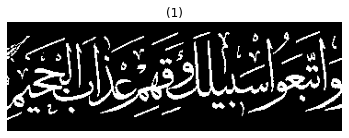

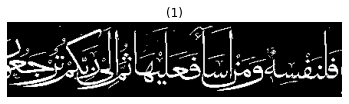

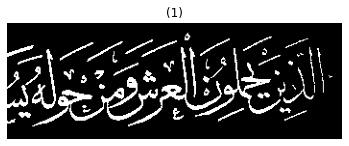

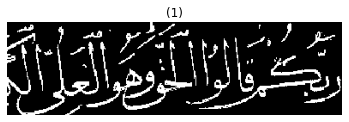

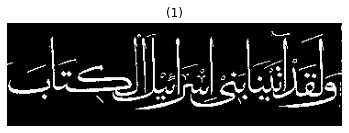

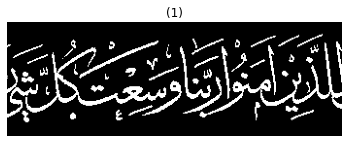

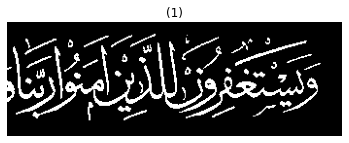

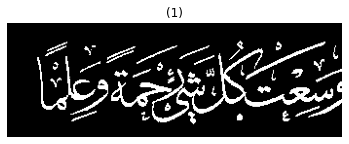

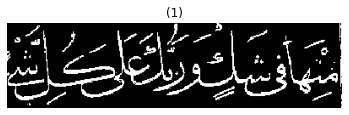

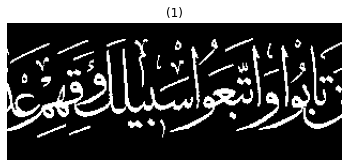

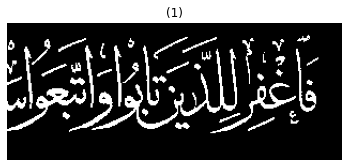

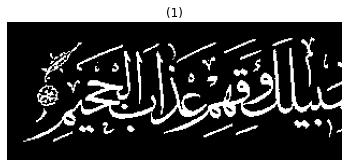

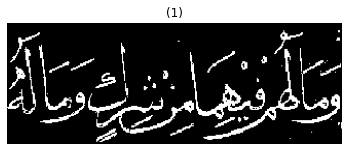

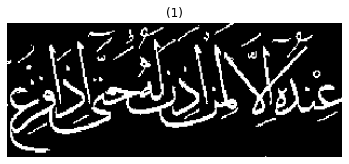

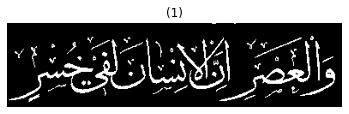

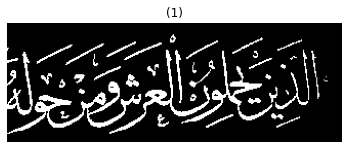

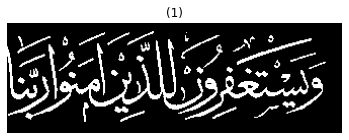

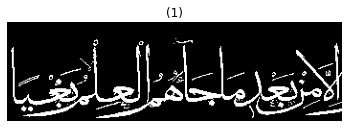

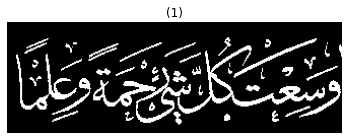

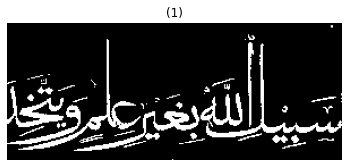

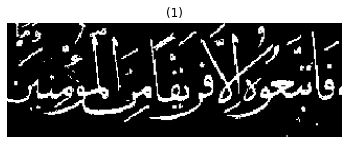

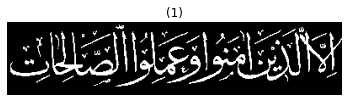

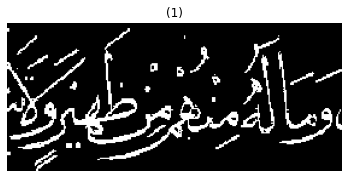

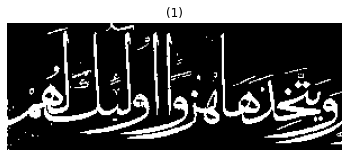

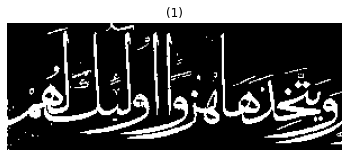

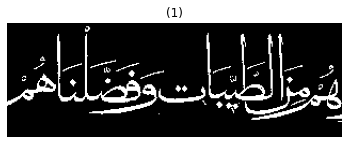

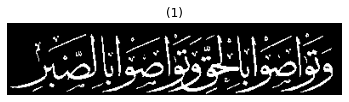

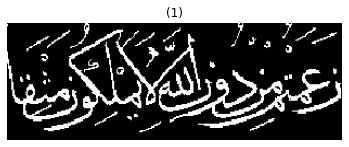

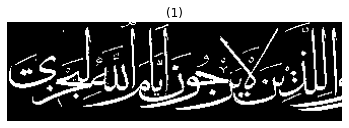

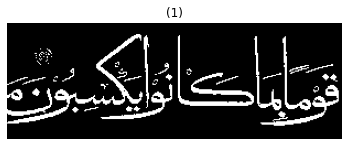

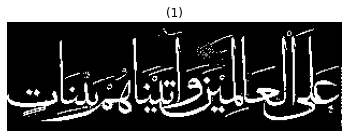

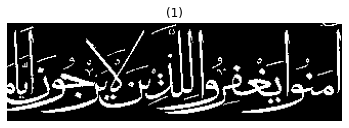

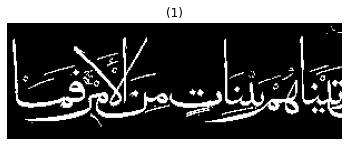

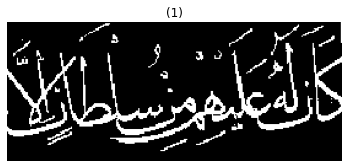

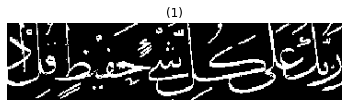

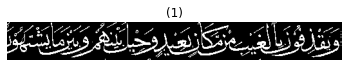

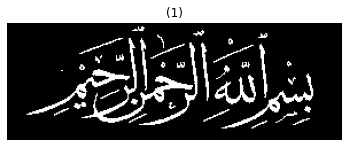

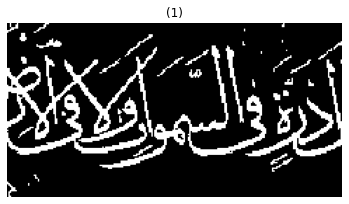

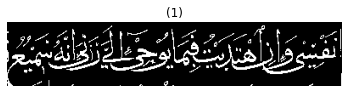

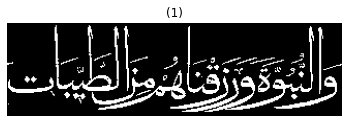

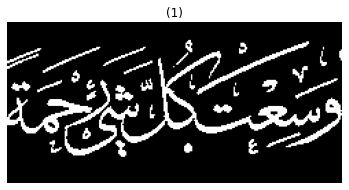

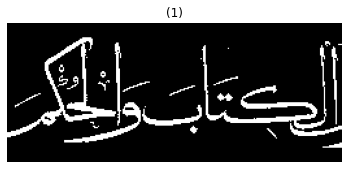

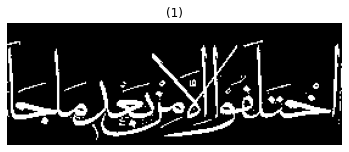

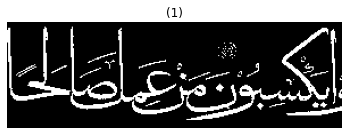

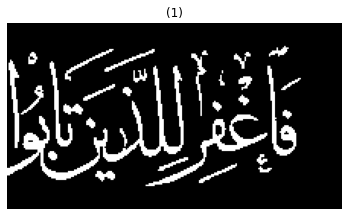

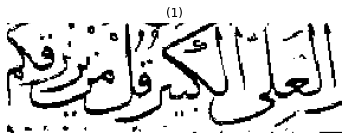

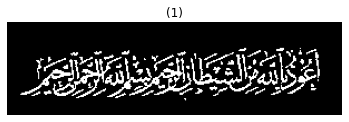

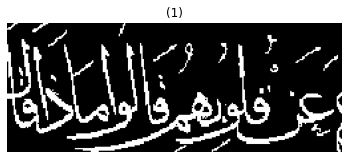

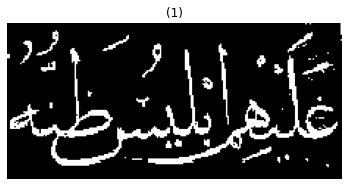

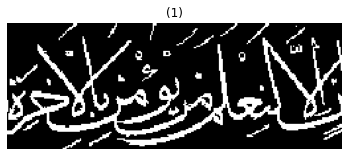

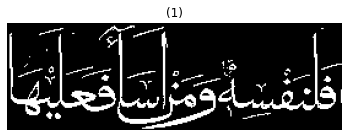

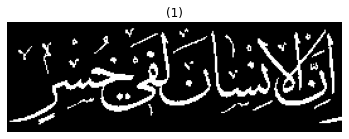

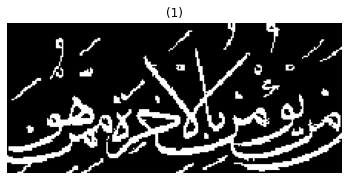

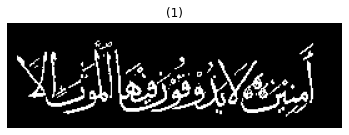

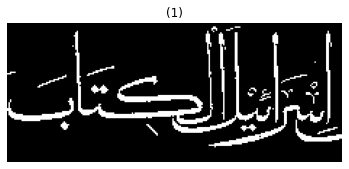

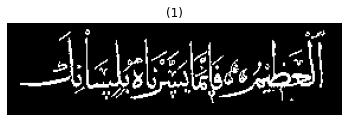

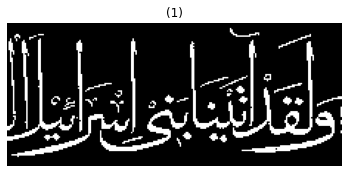

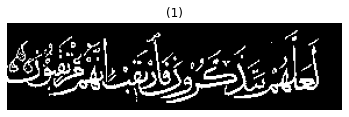

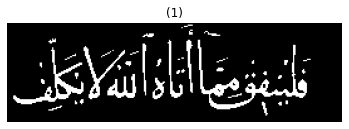

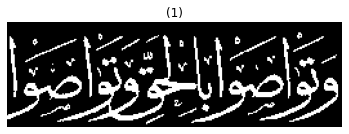

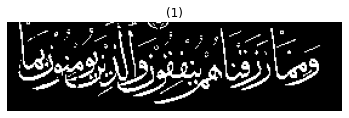

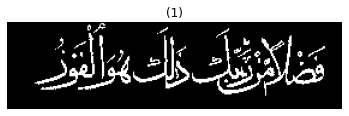

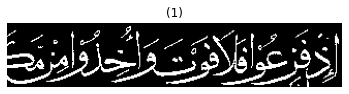

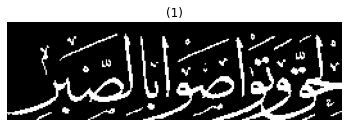

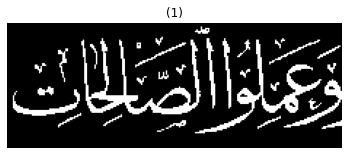

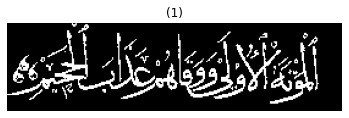

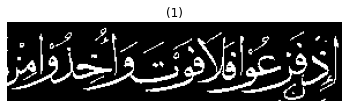

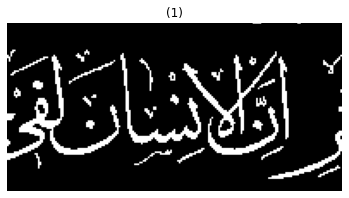

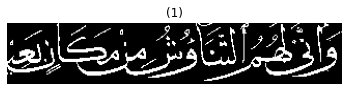

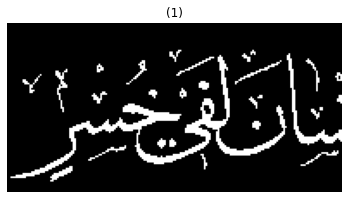

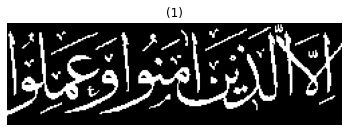

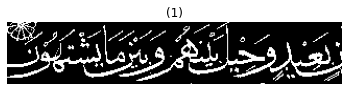

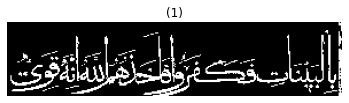

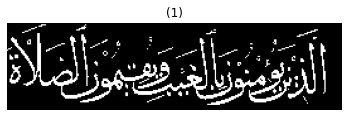

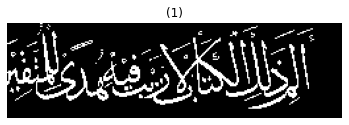

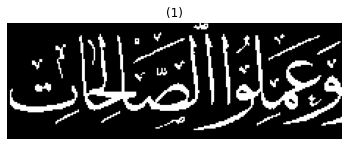

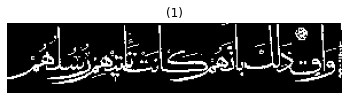

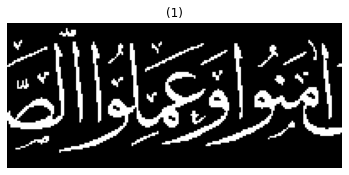

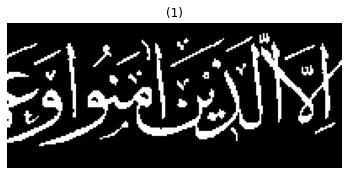

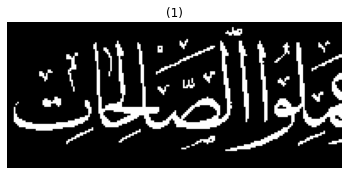

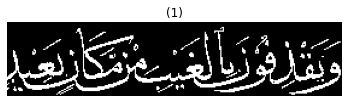

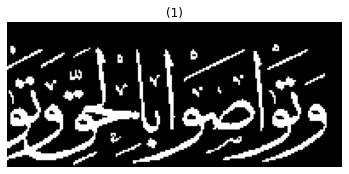

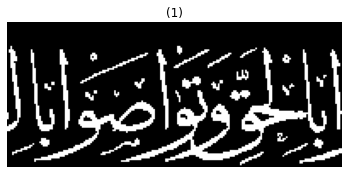

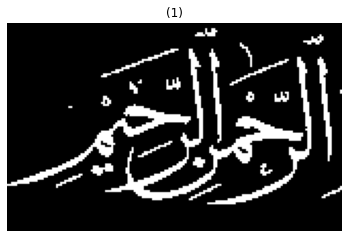

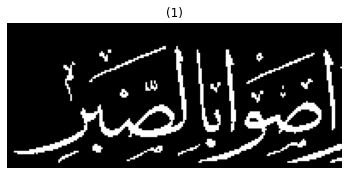

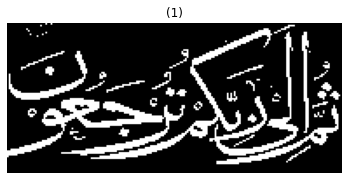

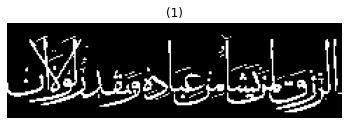

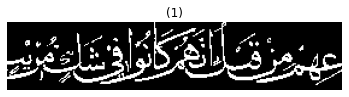

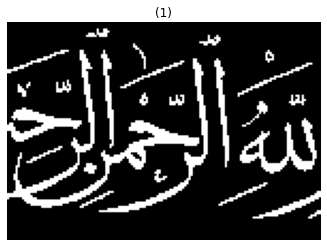

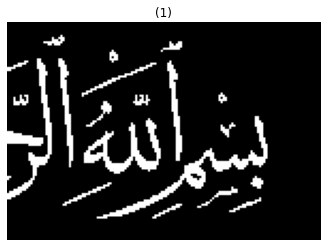

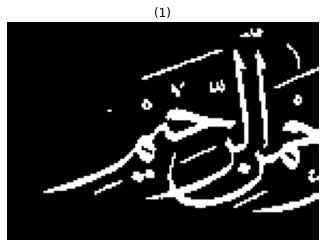

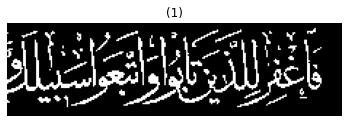

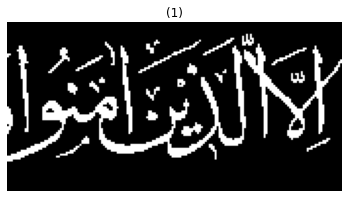

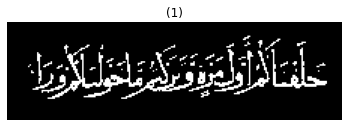

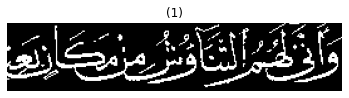

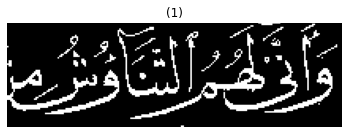

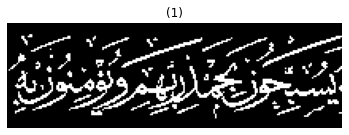

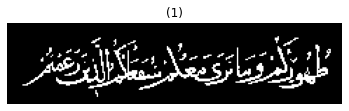

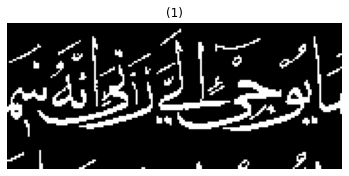

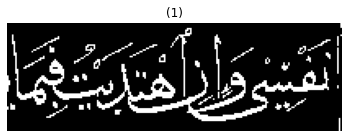

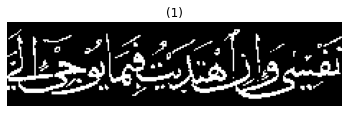

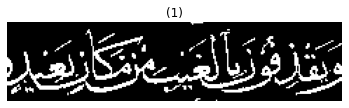

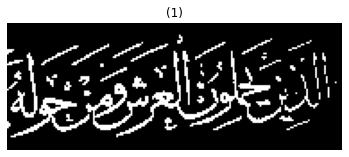

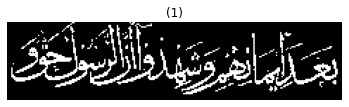

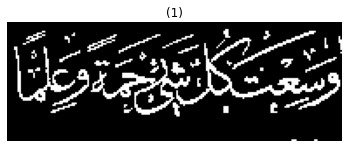

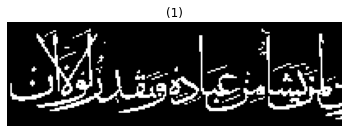

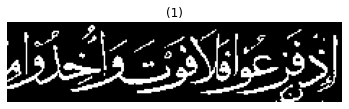

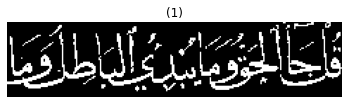

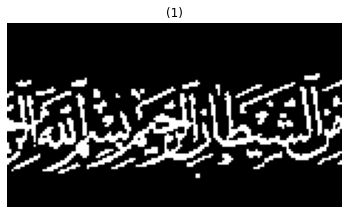

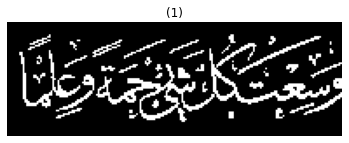

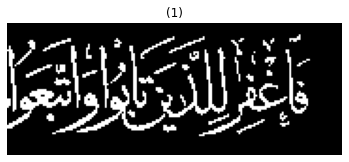

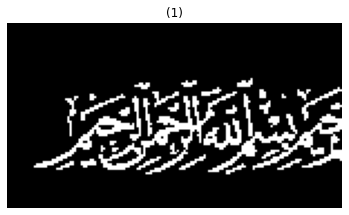

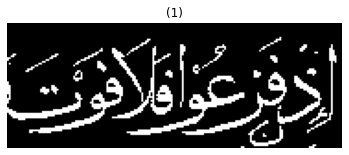

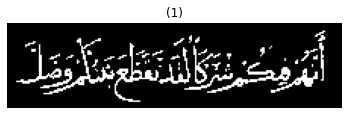

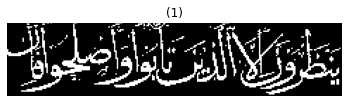

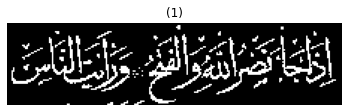

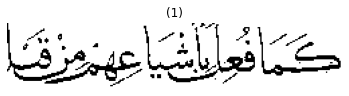

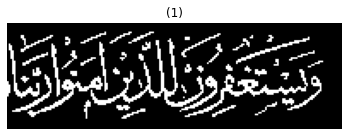

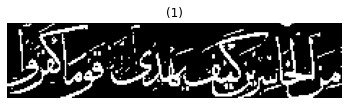

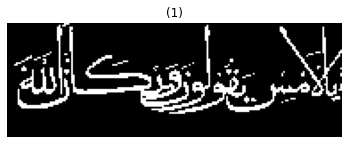

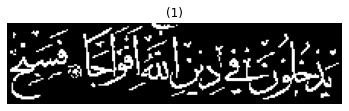

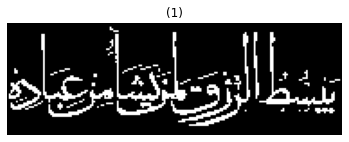

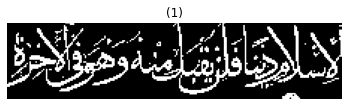

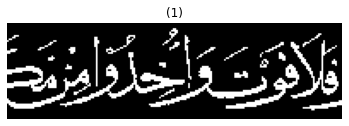

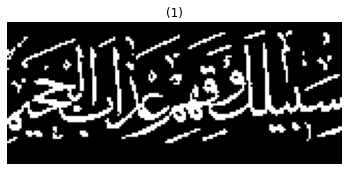

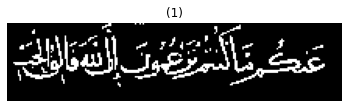

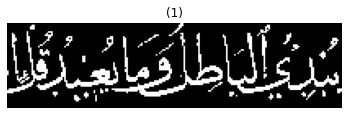

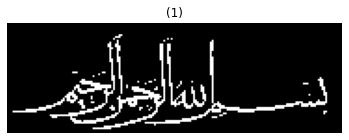

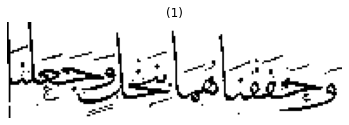

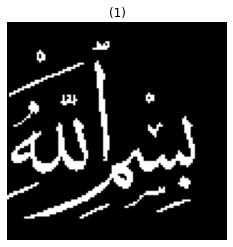

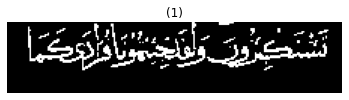

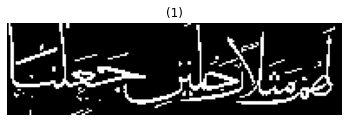

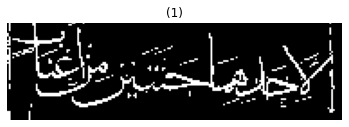

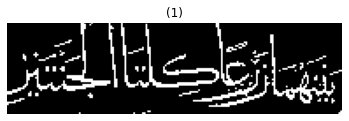

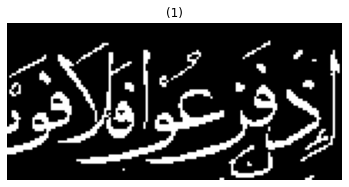

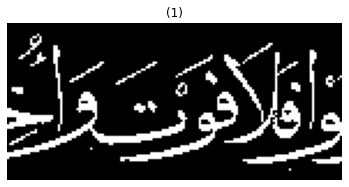

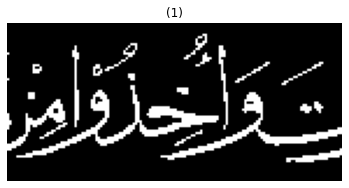

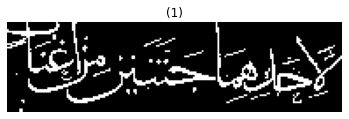

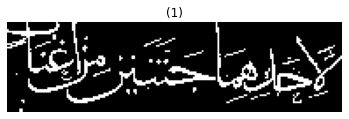

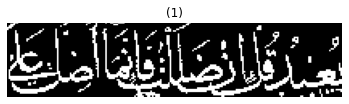

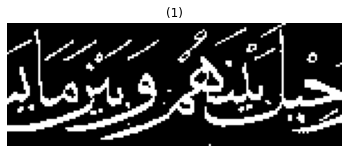

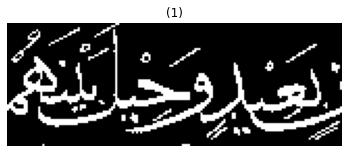

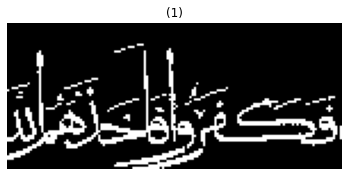

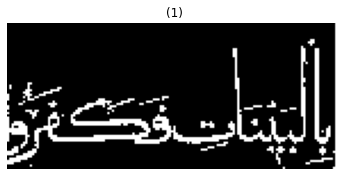

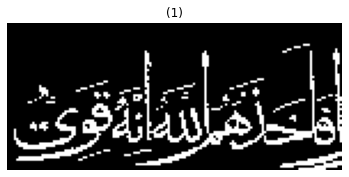

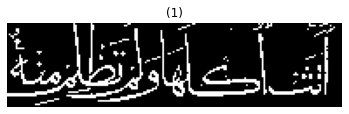

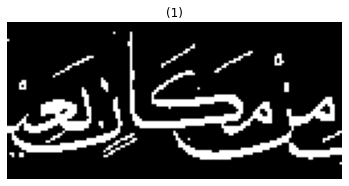

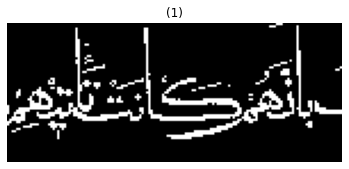

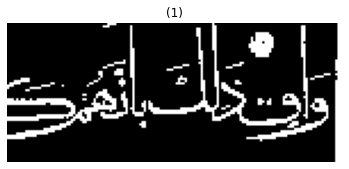

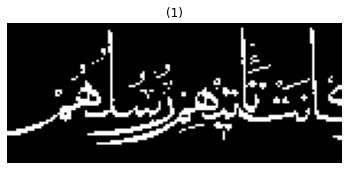

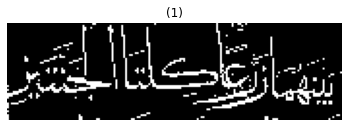

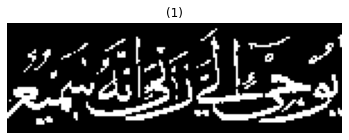

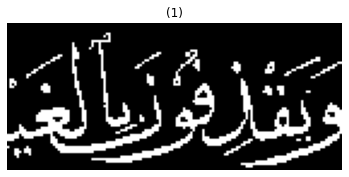

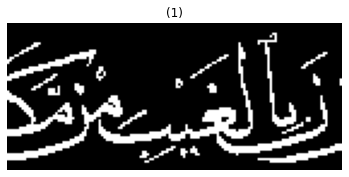

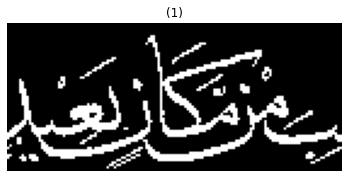

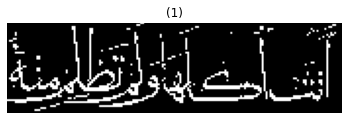

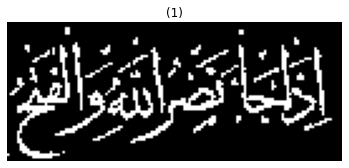

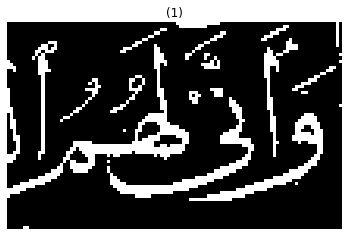

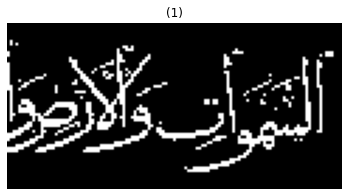

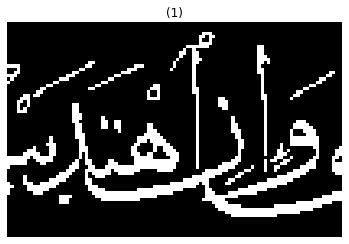

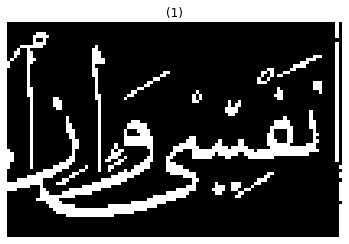

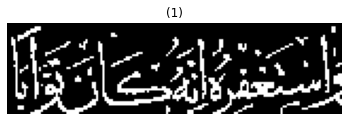

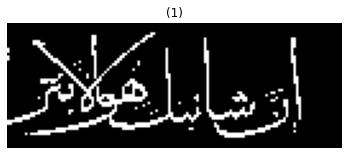

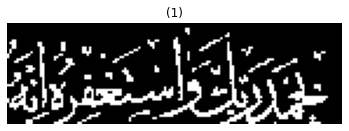

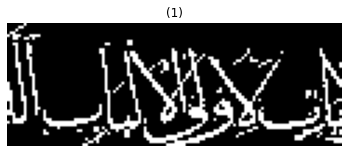

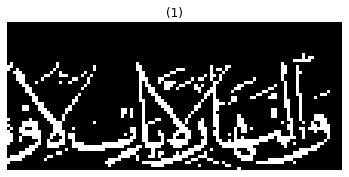

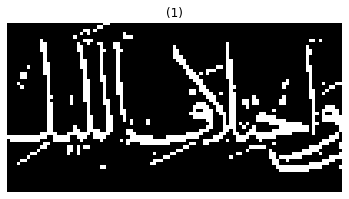

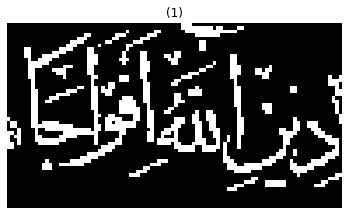

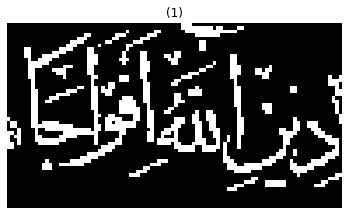

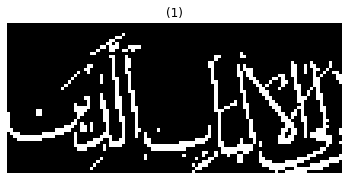

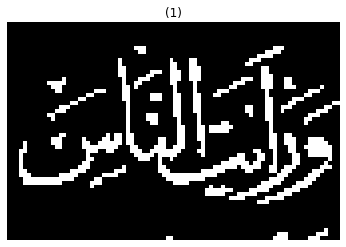

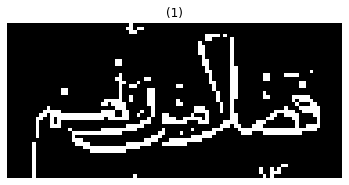

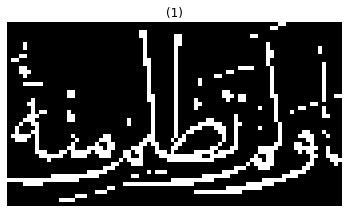

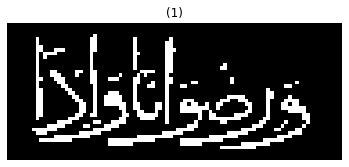

In [2]:
'''
1) READ THE DATASET
'''
x,y = ReadDataSet()


# PHASE-1
Training Phase

In [8]:
model = Phase1(x,y)

NameError: name 'x' is not defined

# PHASE-2
Testing Phase

In [ ]:
# read test data from file
x_test = []
path = "./test"
i=0
list_dir=[int(file.split(".")[0]) for file in os.listdir(path)]
list_dir.sort()
for fname in list_dir:    
    img = io.imread(path + '/' + str(fname)+".png")
    x_test.append(img)
    i += 1

y_test = None
with open('./ground_truth.txt', 'rb') as gt_file:
    y_test = [ int(line)  for line in gt_file.readlines()]
    y_test = np.array(y_test)



In [ ]:
y_pred = np.zeros(len(x_test))
runningTime = np.zeros(len(x_test))

# 1) Loop on test data
total_start = time.time()
for i in range(0,len(x_test)):
    try:    
        #3.a) start timer
        start = time.time()
        #3.b) Preprocess the test image
        x_test[i] = preproccessing(x_test[i].astype('uint8'))
        # show_images([x_test[i]])
        # 3.c) Extract features from the test image
        x_test[i] = extract_features(x_test[i])
        # 3.d) Classify the test image
        y_pred[i] = model.predict([x_test[i]])

        # 3.e) Stop timer
        runningTime[i] = round(time.time()-start,2)
    except:
        runningTime[i] = round(time.time()-start,2)
        y_pred[i] = -1
        continue

total_running = time.time() - total_start


c:\Users\aliaa\Documents\Pattern\Preproccessing.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = rgb2gray(img)
c:\Users\aliaa\Documents\Pattern\Preproccessing.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = rgb2gray(img)
c:\Users\aliaa\Documents\Pattern\Preproccessing.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = rgb2gray(img)
c:\Users\aliaa\Documents\Pattern\Preproccessing.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, ple

In [ ]:
# calculate model accuracy and F1Score
y_pred = np.array(y_pred)
y_test = np.array(y_test)
print('runningTime in sec =', total_running)
print('Accuracy = ' , (np.sum(y_pred == y_test)/len(y_test))*100)
print('F1Score = ',  f1_score(y_test, y_pred, average='weighted') *100)

runningTime in sec = 18.211366891860962
Accuracy =  66.85393258426966
F1Score =  63.53768555985714
